In [1]:
!pip install pytesseract

In [2]:
import pytesseract
try:
 from PIL import Image
except ImportError:
 import Image

In [3]:
image_path_in_colab='/content/sample_data/удл1.png'
# extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
# print(extractedInformation)

In [4]:
!which tesseract

/usr/bin/tesseract


In [5]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [6]:
!sudo apt-get install tesseract-ocr-kaz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kaz is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [7]:
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab), lang='kaz')
print(extractedInformation)

ҚАЗАҚСТАН РЕСПУБЛИКАСЫ РЕСПУБЛИКА
ЖЕКЕ КУӘЛІК УДОСТОВЕРЕНИЕ

поменейкі
ДЖАНХУВАТОВ
атымтай
РАДИК

а екні нобіке

АУВАДЬЕВИЧ

ТУҒАН КҮНІ/ ДАТА РОЖДЕНИЯ

06.09.1991

ж
жо/ши 910906350448 27

 



In [8]:
image_path_in_colab='/content/sample_data/удл3.jpg'

extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab), lang='kaz')
print(extractedInformation)

 

ҚАЗАҚСТАН РЕСПУБЛИКА
РЕСПУБЛИКАСЫ КАЗАХСТАН

ЖЕКЕ КУӘЛІК
УДОСТОВЕРЕНИЕ ЛИЧНОСТИ
ТЕГІ / ФАМИЛИЯ
“. ж. БАСИТОВА
.. АТЫ/ ИМЯ
м” ГУЛЬНАРА
ӘКЕСІНІҢ АТЫ / ОТЧЕСТВО
АУТЖАНОВНА
ТУҒАН КЕЗІ / ДАТА РОЖДЕНИЯ ЖСН / ИИН

Ф е-е” 07.04.1985 яарефынн 162

  

қолы / ПОДПИСЬ



In [9]:
from PIL import Image, ImageFilter

img = Image.open('/content/sample_data/удл1.png')
img = img.filter(ImageFilter.CONTOUR)
img.save("udl1" + ".png")
# img.show()


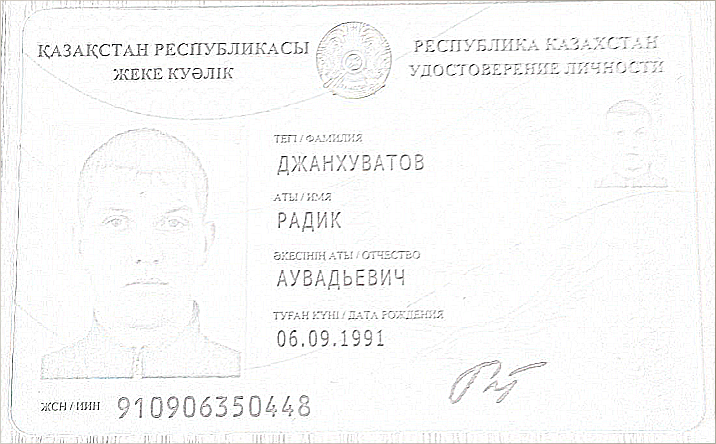

In [10]:
img

In [11]:
extractedInformation = pytesseract.image_to_string(img, lang='kaz')
print(extractedInformation)

 

 

ӘЕЕСІНІҢ АТЫ/Отч5СТЕ0
АУВАДЬЕВИЧ

туға

06,09.1991

 

жене % 09065504 58

)

ч

   

 

 



In [12]:
from google.colab.patches import cv2_imshow

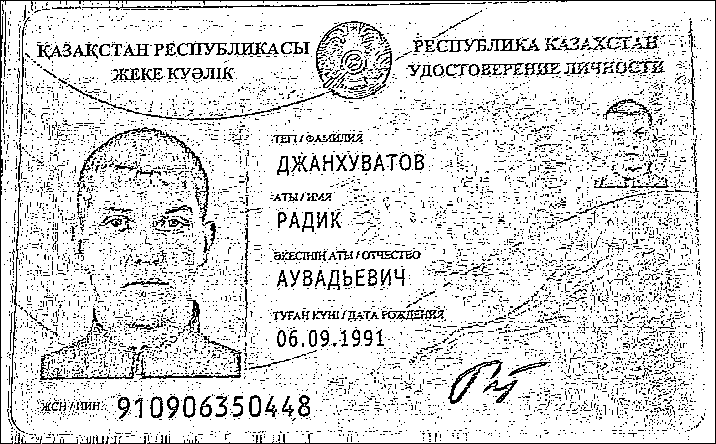

In [13]:
import cv2 as cv
img = cv.imread('/content/udl1.png')
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
adaptive = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 81,4)
cv2_imshow(adaptive)

In [14]:
extractedInformation = pytesseract.image_to_string(adaptive, lang='kaz')
print(extractedInformation)

 

7
ФЕСПУБЛИКА КАЗАХС
УДОСТОВЕРЕНЕЕ ШИЧІ

А АУБАДЫЕВИЧ

 уғАйкеШ ТАЙ

06,09.31991

 

 

 



In [15]:
extractedInformation = pytesseract.image_to_string(img, lang='kaz')
print(extractedInformation)

 

  
  
 

 
  

 

І

|

| |. ҚАЗАҚСТАН РЕСПУБЛИКАСЫ РЕСПУБЛИК
|

 

 

 

ЖЕКЕ КУӘЛІК 7
| <2аеа
|
| 2
| ”.- ӘҮЕСІНІҢ АТЫ/ОТЧЕСТЕ/
| шеге АУВАДЬЕВИЧ
| ту
2 06,09.1991
а ыт 2 же”

жене 01 09063504 48

 

 



In [16]:
!pip install opencv-python

!pip install pytesseract

In [17]:
import cv2
import pytesseract

In [18]:
image = cv2.imread('/content/udl1.png')

In [19]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [20]:
threshold_img = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

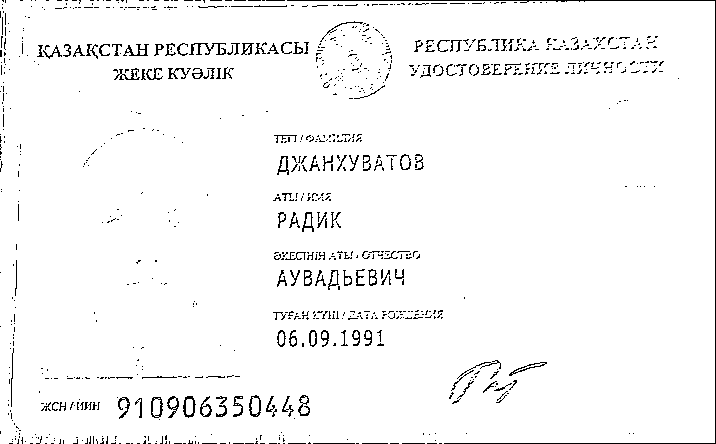

In [21]:
cv2_imshow(threshold_img)

In [22]:
custom_config = r'--oem 3 --psm 6'

In [23]:
from pytesseract import Output

In [24]:
details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='kaz')

In [25]:
print(details.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [26]:
total_boxes = len(details['text'])
for sequence_number in range(total_boxes):
  if int(details['conf'][sequence_number]) >30:
    (x, y, w, h) = (details['left'][sequence_number], details['top'][sequence_number], details['width'][sequence_number],  details['height'][sequence_number])
    threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

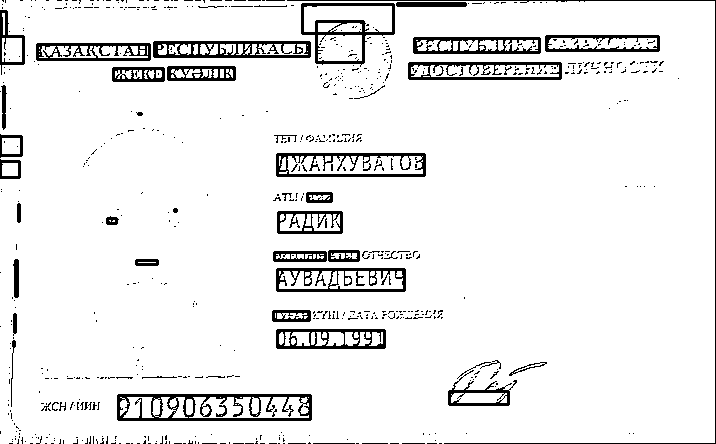

In [27]:
cv2_imshow(threshold_img)

In [28]:
details['text']

['',
 '',
 '',
 '',
 '|',
 'тете',
 'е-е',
 'се',
 'Ө----Т-----',
 'е',
 '“ата.',
 '0000',
 'З-',
 '',
 'ІІ.',
 'ҚАЗАҚСТАН',
 'РЕСПУБЛИКАСЫ',
 'е',
 'ЗА',
 'РЕСПУБЛИКА',
 'БАЗАХСТАН',
 '',
 'ЖЕКЕ',
 'КУӘЛІК',
 'созба)',
 'ҰДОСТОБЕРЕНИЕ',
 'ЛИЯНООТИ',
 '',
 '|',
 'ФғаР',
 '',
 '|',
 '-',
 '',
 'г',
 'е',
 'тәп/оамилия',
 '',
 '1',
 ':',
 'ДЖАНУУВАТОВ',
 '',
 '',
 'і',
 'е',
 ';',
 'АТМ/',
 'ИМЯ',
 '',
 '',
 'ж',
 'РАДИК',
 '',
 '',
 '!',
 '-.',
 'ӘКЕСІНІН',
 'АҒЫ.',
 'ӨТСЕ',
 '',
 '',
 '|',
 '-0-',
 'АУВАДЬЕВИЧ',
 '',
 '',
 '|',
 'туған',
 'сашедатаоишруя',
 '',
 '',
 '1',
 ':',
 '06.09.1991',
 '',
 '',
 '1',
 'жәен',
 '910906350448',
 '“27',
 '',
 'Қаға',
 'тн',
 '220045202000',
 '02.']

In [29]:
img = cv2.imread('/content/sample_data/back.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("/content/back.png",img)

img = Image.open('/content/back.png')
img = img.filter(ImageFilter.CONTOUR)

custom_config = r'-l kaz+eng --psm 6'
extractedInformation = pytesseract.image_to_string(img, config=custom_config)
# extractedInformation = pytesseract.image_to_string(img, lang="kaz")
print(extractedInformation)
img.show()


- ПШІШЛІЛІІІ./ озен |
ә. 2 sigeh ads omen = 2 5
use НУРСУЛТАН. 5 = =
= 22-1 derdanexene/oeriy aera = a=. =
: 20-1 МИНИСТЕРСТВО ЮСТИЦИЙ Be 4
: Ae вейген кезі- KON AAMNY NaI / Aa BLINAL COR IPCTSIA |
Б сез--2 254320220 1502 2024 on eee 1
IDKAZO411821511820712304421<<<
8207113 F2102134KALZ<<<<<<<<<<<4
ABDRAKHMANOVA< < ALTYNAI < <<<<<<<<<<<<<



In [30]:
img = cv2.imread('/content/удл2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("/content/back.png",img)

img = Image.open('/content/удл2.png')
img = img.filter(ImageFilter.CONTOUR)

custom_config = r'-l kaz+eng --psm 6'
extractedInformation = pytesseract.image_to_string(img, config=custom_config)
# extractedInformation = pytesseract.image_to_string(img, lang="kaz")
print(extractedInformation)


с 2-22-22 ан Ес -2-2-2-- а айна с-з саз 2
| ШТІ | 222. -
- ІШІ 956129491
еі eS ТУҒАН ЖЕРІ / МЕСТО РОЖДЕНИЯ
42 2 АЛМАТЫ 2
= = - bye Cah ете ж
ІСІН БЕРГЕН LEMAIRE ВЫДАЧИ
-. ЕЦ МВД РЕСПУБЛИКИ ҚАЗАХСТАН

е) БЕРІЛГЕН КЕЗІ - ҚОЛДАНЫЛУ МЕРЗІМІ / ДАТА БЫДАЧИ- СРОК ДЕЙСТВИЯ :
|: Noe) 06.03.2014 05.03.2024 |
| -
| IDKAZ0361294913970819300073<<< .
9708192И2403052КА7<<<<<<<<<<<1 |
| ЕНАУВІМ<<АҺЕХАМРВ<<<<<<<<<<< уҙ
| 5

жана ынта: ж. рес йа ші 1: М ый

